In [12]:
import numpy as np
# Set number of replications
N = 1000

# fix random number seed
np.random.seed(1)

# Define lists to keep samples of the outputs across replications
T_list = []
Ave_list = []

# Run the simulation for N times
for i in range(1,N+1):
  average = 0
  X = np.random.uniform(2,8) # Define the domain and distribution of X
  theta = max(0,X-4) # Define θ function
  T_list.append(theta) # Update each simulation result
  average = sum(T_list)/i # Take the average of all simulated θ
  Ave_list.append(average) # Update the average of to list

In [15]:
print('Estimated expected θ:', np.mean(T_list))
print ('95% CI for θ:', np.mean(T_list),'+/-',1.96*np.std(T_list, ddof = 1)/np.sqrt(N))

Estimated expected θ: 1.3383673235881042
95% CI for θ: 1.3383673235881042 +/- 0.08217292686292378


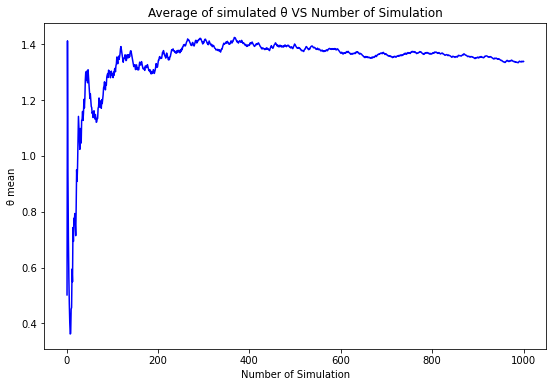

In [16]:
import matplotlib.pyplot as plt
X1 = range(1,1001)
Y1 = Ave_list
plt.figure(figsize=(9,6))
plt.plot(X1, Y1, 'b')
plt.title('Average of simulated θ VS Number of Simulation')
plt.xlabel('Number of Simulation')
plt.ylabel('θ mean')
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set number of replications
N = 1
# Define lists to keep samples of the outputs across replications
TTF_list = []
Ave_list = []

# fix random number seed
np.random.seed(1)

for rep in range (0,N):
    # start with 2 functioning components at time 0
    clock = 0
    S = 2
    # initialize the time of events
    NextRepair = float('inf')
    NextFailure = np.ceil(6*np.random.random())
    EventTimes = [0]
    States = [2]
    # Define variables to keep the area under the sample path
    # and the time and state of the last event
    Area = 0.0
    Tlast = 0
    Slast = 2

    while clock <3000:  # Change the condition to T = 1000
        # advance the time
        clock = min(NextRepair, NextFailure)

        if NextRepair < NextFailure:
            # next event is completion of a repair
            S = S + 1
            if S==2:
              NextRepair = float('inf')  # no machine under repair
            else: 
              NextRepair = clock + 2.5 # start repairing the second machine
        else:
            # next event is a failure, States cannot be below 0
            S = max(0,S - 1)
            # Next failture happends with at least 1 machine is running + the failure time
            if S==0:
              NextRepair = clock + 2.5
              NextFailure = max(NextRepair + np.ceil(6*np.random.random()), clock + np.ceil(6*np.random.random()))
            if S==1:
              NextRepair = clock + 2.5
              NextFailure = clock + np.ceil(6*np.random.random())

        # Update the area under the sample path and the
        # time and state of the last event
        Area = Area + (min(3000,clock) - Tlast)* Slast
        Tlast = min(3000,clock) # Clock within 3000
        Slast = S

    # The Average of S within time T = 3000
    Ave_list.append(Area/3000)

print('Estimated expected ave. # of func. comp. till T=3000:', np.mean(Ave_list))

Estimated expected ave. # of func. comp. till T=3000: 1.1611666666666667


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set number of replications
N = 1
# Define lists to keep samples of the outputs across replications
TTF_list = []
Ave_list = []

# fix random number seed
np.random.seed(1)

for rep in range (0,N):
    # start with 2 functioning components at time 0
    clock = 0
    S = 2
    # initialize the time of events
    NextRepair = float('inf')
    NextFailure = np.ceil(6*np.random.random())
    EventTimes = [0]
    States = [2]
    # Define variables to keep the area under the sample path
    # and the time and state of the last event
    Area = 0.0
    Tlast = 0
    A_t = 1 # A_t = 1 if at least 1 machine is running, = 0 OW

    while clock <3000:  # Change the condition to T = 1000
        # advance the time
        clock = min(NextRepair, NextFailure)

        if NextRepair < NextFailure:
            # next event is completion of a repair
            S = S + 1
            if S==2:
              NextRepair = float('inf')  # no machine under repair
            else: 
              NextRepair = clock + 2.5 # start repairing the second machine
        else:
            # next event is a failure, States cannot be below 0
            S = max(0,S - 1)
            # Next failture happends with at least 1 machine is running + the failure time
            if S==0:
              NextRepair = clock + 2.5
              NextFailure = max(NextRepair + np.ceil(6*np.random.random()), clock + np.ceil(6*np.random.random()))
            if S==1:
              NextRepair = clock + 2.5
              NextFailure = clock + np.ceil(6*np.random.random())

        # Update the area under the sample path and the
        # time and state of the last event
        Area = Area + (min(3000,clock) - Tlast)* A_t
        Tlast = min(3000,clock) # Clock within 3000
        # if S>0 system is availbe A(t) = 1, if S=0 A(t)=0 system is down
        if S== 0:
          A_t = 0
        else:
          A_t = 1

    # The Average of A_t within time T = 3000
    Ave_list.append(Area/3000)

print('Estimated expected ave. system availibility till T=3000:', np.mean(Ave_list))

Estimated expected ave. system availibility till T=3000: 0.8341666666666666


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set number of replications
R = 1000
# Define lists to keep samples of the outputs across replications
TTF_list = []
Ave_list = []

# fix random number seed
np.random.seed(1)

# Set the number of components N
N = int(input('enter the number of components in the system:'))
for rep in range (0,R):
    # start with 2 functioning components at time 0
    clock = 0
    S = N
    # initialize the time of events
    NextRepair = float('inf')
    NextFailure = np.ceil(6*np.random.random())
    EventTimes = [0]
    States = [S]
    # Define variables to keep the area under the sample path
    # and the time and state of the last event
    Area = 0.0
    Tlast = 0
    Slast = S

    while S > 0:
        # advance the time
        clock = min(NextRepair, NextFailure)

        if NextRepair < NextFailure:
            # next event is completion of a repair
            S = S + 1
            NextRepair = float('inf')
        else:
            # next event is a failure
            S = S - 1
            if S > 0:
                NextRepair = clock + 2.5
                NextFailure = clock + np.ceil(6*np.random.random())
        # Update the area under the sample path and the
        # time and state of the last event
        Area = Area + (clock - Tlast)* Slast
        Tlast = clock
        Slast = S

    # save the TTF and average # of func. components
    TTF_list.append(clock)
    Ave_list.append(Area/clock)

print('Estimated expected TTF:', np.mean(TTF_list))
print('Estimated expected ave. # of func. comp. till failure:', np.mean(Ave_list))

print ('95% CI for TTF:', np.mean(TTF_list), "+/-",
       1.96*np.std(TTF_list, ddof = 1)/np.sqrt(R))
print ('95% CI for ave. # of func. comp.:', np.mean(Ave_list), "+/-",
       1.96*np.std(Ave_list, ddof = 1)/np.sqrt(R))

enter the number of components in the system:2
Estimated expected TTF: 13.927
Estimated expected ave. # of func. comp. till failure: 1.568840332841451
95% CI for TTF: 13.927 +/- 0.7274410509424089
95% CI for ave. # of func. comp.: 1.568840332841451 +/- 0.008120648766690015


Enter the number of samples: 500


(array([  8.,  27.,  88., 130., 208., 224., 179.,  93.,  33.,  10.]),
 array([0.45951331, 0.4673511 , 0.47518889, 0.48302668, 0.49086448,
        0.49870227, 0.50654006, 0.51437785, 0.52221565, 0.53005344,
        0.53789123]),
 <a list of 10 Patch objects>)

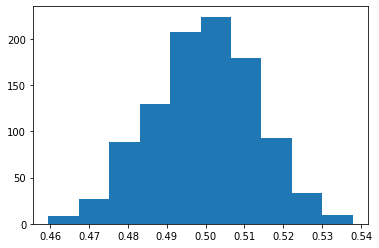

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set number of replications
N = 1000

# input the number of samples
n = int(input('Enter the number of samples: '))

# fix random number seed
np.random.seed(1)

Xn = []
Ave_Xn = []
for i in range(1,N+1):
  for j in range(n):
    X = np.random.uniform(0,1) # Define the domain and distribution of X
    Xn.append(X)
  Ave_Xn.append(np.mean(Xn))
  Xn = []
plt.hist(Ave_Xn)